In [1]:
import numpy as np
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# ngrok = "https://9913-2600-1010-b0e3-425-a8de-445f-c65c-a74e.ngrok.io/"


/Users/user/miniconda3/envs/prophet/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
train = pd.read_csv('train.csv')
train.head().T

,0,1,2,3,4
Datetime,2018-01-01 06:20:00+00:00,2018-01-01 06:40:00+00:00,2018-01-01 06:50:00+00:00,2018-01-01 10:40:00+00:00,2018-01-01 12:00:00+00:00
ActivePower,26.212347,59.632658,40.88965,34.398111,29.797653
AmbientTemperatue,28.696304,29.052567,28.984758,30.282058,29.333519
BearingShaftTemperature,NaN,NaN,NaN,NaN,NaN
Blade1PitchAngle,NaN,NaN,NaN,NaN,NaN
Blade2PitchAngle,NaN,NaN,NaN,NaN,NaN
Blade3PitchAngle,NaN,NaN,NaN,NaN,NaN
GearboxBearingTemperature,NaN,NaN,NaN,NaN,NaN
GearboxOilTemperature,NaN,NaN,NaN,NaN,NaN
GeneratorRPM,NaN,NaN,NaN,NaN,NaN


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77202 entries, 0 to 77201
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Datetime                      77202 non-null  object 
 1   ActivePower                   77202 non-null  float64
 2   AmbientTemperatue             76306 non-null  float64
 3   BearingShaftTemperature       50518 non-null  float64
 4   Blade1PitchAngle              33920 non-null  float64
 5   Blade2PitchAngle              33837 non-null  float64
 6   Blade3PitchAngle              33837 non-null  float64
 7   GearboxBearingTemperature     50520 non-null  float64
 8   GearboxOilTemperature         50532 non-null  float64
 9   GeneratorRPM                  50528 non-null  float64
 10  GeneratorWinding1Temperature  50546 non-null  float64
 11  GeneratorWinding2Temperature  50553 non-null  float64
 12  HubTemperature                50410 non-null  float64
 13  M

In [4]:
# check missing Dates
train['Datetime'].isnull().sum()

0

In [5]:
train['Datetime']= pd.to_datetime(train['Datetime']).dt.date

In [6]:
# check the relation between the datetime and all the columns
train.groupby('Datetime').mean()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
Datetime,,,,,,,,,,,,,,,,,,,
2018-01-01,366.223561,25.528849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276.727612,74.042120,NaN,NaN,276.727612,5.263797
2018-01-02,462.550740,25.357526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.105603,93.555723,NaN,NaN,274.105603,5.390719
2018-01-03,454.417752,24.379363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.369130,91.627843,NaN,NaN,286.369130,5.295225
2018-01-04,369.952190,24.912347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284.445471,74.360621,NaN,NaN,284.445471,5.094994
2018-01-05,319.446595,23.535679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,292.013293,64.366148,NaN,NaN,292.013293,4.915224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-11,466.289248,28.276232,44.059155,0.482881,0.934002,0.934002,64.106761,56.921031,1163.017505,67.939614,67.174603,38.635532,39.955577,183.729298,71.852813,10.420975,2.030612,183.729298,5.385570
2020-03-12,570.315539,29.094133,44.476550,1.206977,1.629283,1.629283,64.051326,56.194520,1217.638162,70.008635,69.288543,39.978688,40.757739,180.773250,84.040654,10.931663,2.033333,180.773250,5.693483
2020-03-13,619.637333,30.088163,45.903233,2.168904,2.609776,2.609776,65.348205,57.663415,1213.959374,72.745844,72.096953,39.562485,41.600482,187.621975,99.693231,10.884414,2.059259,187.621975,5.765318


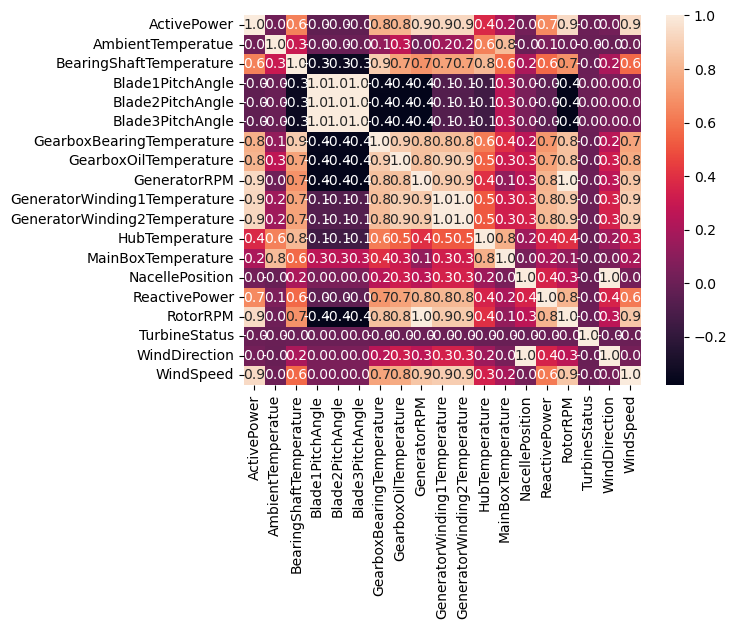

In [7]:
# heatmap to check the correlation between the columns .1f format
import seaborn as sns
corr = train.corr()
sns.heatmap(corr, annot=True, fmt='.1f')


train.index = train['Datetime']
# preserve the columns that have correlation with the ActivePower greater than 0.8
train = train[[x for x in train.columns if x != "Datetime" and train[x].corr(train['ActivePower']) > 0.9]]





In [8]:

train = train.groupby('Datetime').mean()

In [9]:
train

,ActivePower,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,RotorRPM,WindSpeed
Datetime,,,,,,
2018-01-01,366.223561,NaN,NaN,NaN,NaN,5.263797
2018-01-02,462.550740,NaN,NaN,NaN,NaN,5.390719
2018-01-03,454.417752,NaN,NaN,NaN,NaN,5.295225
2018-01-04,369.952190,NaN,NaN,NaN,NaN,5.094994
2018-01-05,319.446595,NaN,NaN,NaN,NaN,4.915224
...,...,...,...,...,...,...
2020-03-11,466.289248,1163.017505,67.939614,67.174603,10.420975,5.385570
2020-03-12,570.315539,1217.638162,70.008635,69.288543,10.931663,5.693483
2020-03-13,619.637333,1213.959374,72.745844,72.096953,10.884414,5.765318


In [10]:
# interpolate the missing values in WindSpeed
train["WindSpeed"] = train["WindSpeed"].interpolate(method='linear')
train.isnull().sum()

ActivePower                       0
GeneratorRPM                    273
GeneratorWinding1Temperature    273
GeneratorWinding2Temperature    273
RotorRPM                        273
WindSpeed                         0
dtype: int64

In [11]:
from prophet import Prophet

In [12]:
train

,ActivePower,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,RotorRPM,WindSpeed
Datetime,,,,,,
2018-01-01,366.223561,NaN,NaN,NaN,NaN,5.263797
2018-01-02,462.550740,NaN,NaN,NaN,NaN,5.390719
2018-01-03,454.417752,NaN,NaN,NaN,NaN,5.295225
2018-01-04,369.952190,NaN,NaN,NaN,NaN,5.094994
2018-01-05,319.446595,NaN,NaN,NaN,NaN,4.915224
...,...,...,...,...,...,...
2020-03-11,466.289248,1163.017505,67.939614,67.174603,10.420975,5.385570
2020-03-12,570.315539,1217.638162,70.008635,69.288543,10.931663,5.693483
2020-03-13,619.637333,1213.959374,72.745844,72.096953,10.884414,5.765318


In [13]:
train.rename(columns={'ActivePower': 'y', 'Datetime': 'ds'}, inplace=True)
train['ds'] = train.index


train = train[['y', 'ds',"WindSpeed"]]
train

,y,ds,WindSpeed
Datetime,,,
2018-01-01,366.223561,2018-01-01,5.263797
2018-01-02,462.550740,2018-01-02,5.390719
2018-01-03,454.417752,2018-01-03,5.295225
2018-01-04,369.952190,2018-01-04,5.094994
2018-01-05,319.446595,2018-01-05,4.915224
...,...,...,...
2020-03-11,466.289248,2020-03-11,5.385570
2020-03-12,570.315539,2020-03-12,5.693483
2020-03-13,619.637333,2020-03-13,5.765318


In [23]:
# rename the columns from ActivePower to y and Datetime to ds

#Prophet project
m = Prophet()
# m.add_regressor('WindSpeed')

#Fit with default settings
m.fit(train)
#Fataframe with forecasting steps
future = m.make_future_dataframe(periods=15)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -31.8012
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      95       1044.26    0.00128682       66.8406   1.683e-05       0.001      169  LS failed, Hessian reset 
      99       1044.29   0.000127835       67.4074      0.3139           1      176   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     196       1044.39   0.000514665       64.2167   6.817e-06       0.001      348  LS failed, Hessian reset 
     199        1044.4    8.8359e-05       67.3684      0.8159      0.8159      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     251       1044.42   3.08783e-05        89.296   3.892e-07       0.001      480  LS failed, Hessian reset 
     288       1044.42   1.03397e-06        85.804   1.651e-08       0.001      574  LS failed, Hessian reset 
     296       1044.42   2.63397e-08       57.2851      0.3498   

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast)

df_cv = cross_validation(m, horizon='15 days', parallel="processes");
df_p = performance_metrics(df_cv, rolling_window=10);

In [25]:
df_p['rmse'].values[0]

330.18030926204744

In [17]:
%%capture
import itertools
import numpy as np
import pandas as pd
from prophet.diagnostics import cross_validation, performance_metrics

# cutoffs = pd.to_datetime(['2013-02-15', '2013-08-15', '2014-02-15'])
# df_cv2 = cross_validation(m, cutoffs=cutoffs, horizon='365 days')
def test_param(param_grid):
    all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
    rmse = []  # Store the RMSEs for each params here

    # Use cross validation to evaluate all parameters
    for params in all_params:
        m = Prophet(**params).fit(train); # Fit model with given params
        df_cv = cross_validation(m, horizon='15 days', parallel="processes");
        df_p = performance_metrics(df_cv, rolling_window=10);
        rmse.append(df_p['rmse'].values[0]);

    # Find the best parameters
    tuning_results = pd.DataFrame(all_params)
    tuning_results['rmse'] = rmse
    return tuning_results



In [ ]:
''' 
after couple of times of tuning, this is the best params set
'''
param_grid = {  
    'changepoint_prior_scale': [0.01],
    'seasonality_prior_scale': [0.013,0.015,0.018], 
    "holidays_prior_scale":[0.01],
}

tuning_results = test_param(param_grid)

In [19]:
print(tuning_results)

   changepoint_prior_scale  seasonality_prior_scale  holidays_prior_scale  \
0                     0.01                    0.013                  0.01   
1                     0.01                    0.015                  0.01   
2                     0.01                    0.018                  0.01   

         rmse  
0  329.810647  
1  318.021804  
2  311.344621  


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -31.8012
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       905.101   2.12742e-06       479.993      0.2766      0.7393      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     121       905.106    3.8932e-06       506.771   7.963e-09       0.001      192  LS failed, Hessian reset 
     141       905.107   6.58238e-09       413.653      0.5696      0.5696      220   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


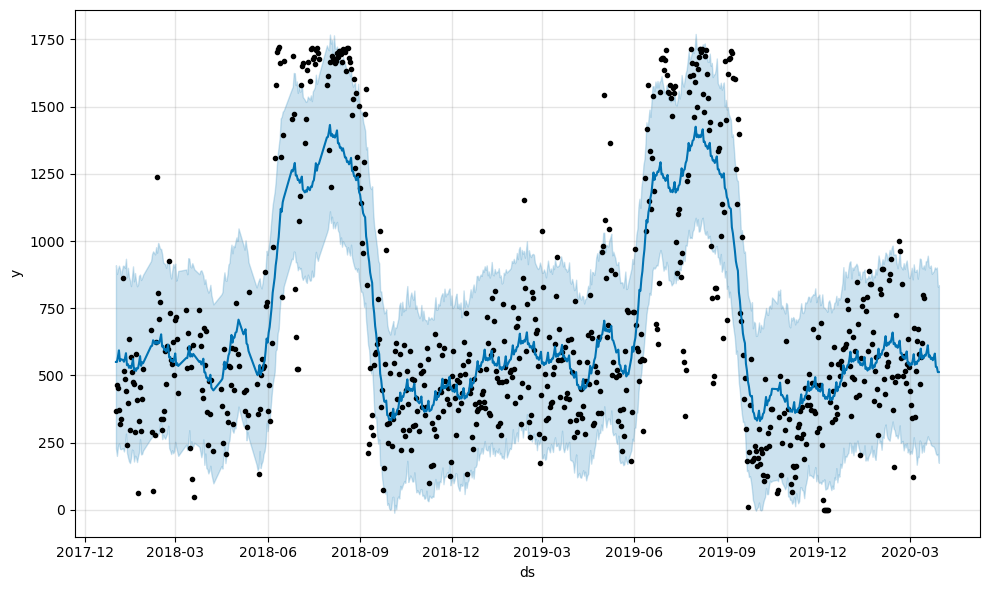

In [28]:
m = Prophet(**{
    'changepoint_prior_scale': 0.01,
    'seasonality_prior_scale': 0.018,
    "holidays_prior_scale":0.01,
})

#Fit with default settings
m.fit(train)
#Fataframe with forecasting steps
future = m.make_future_dataframe(periods=15)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast)

In [ ]:
df_cv = cross_validation(m, horizon='15 days', parallel="processes");
df_p = performance_metrics(df_cv, rolling_window=10);

In [30]:
df_p

,horizon,mse,rmse,mae,mdape,smape,coverage
0,15 days,96935.472897,311.344621,242.460454,0.294542,0.39526,0.733493
